## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read the dataset and get basic overview of the data

We can see that:

- There are total 22 columns in the dataset, where 21 are feature columns and one is target column.
- Total 32950 entries in each column.
- There is a mixture of different types of data, that includes int, float and categorical data.
- There is no missing data in the dataset.

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32950 non-null  int64  
 1   age             32950 non-null  int64  
 2   job             32950 non-null  object 
 3   marital         32950 non-null  object 
 4   education       32950 non-null  object 
 5   default         32950 non-null  object 
 6   housing         32950 non-null  object 
 7   loan            32950 non-null  object 
 8   contact         32950 non-null  object 
 9   month           32950 non-null  object 
 10  day_of_week     32950 non-null  object 
 11  duration        32950 non-null  int64  
 12  campaign        32950 non-null  int64  
 13  pdays           32950 non-null  int64  
 14  previous        32950 non-null  int64  
 15  poutcome        32950 non-null  object 
 16  emp.var.rate    32950 non-null  float64
 17  cons.price.idx  32950 non-null 

## Getting a statistical overview of numerical data

In [4]:
data.describe()

,Id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,20618.796601,40.014112,258.127466,2.560607,962.052413,0.174719,0.080470,93.575881,-40.508489,3.618395,5166.899651
std,11899.673392,10.403636,258.975917,2.752326,187.951096,0.499025,1.571266,0.579209,4.628223,1.735896,72.434812
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10315.250000,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20632.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30952.750000,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41187.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Checking the first 10 entries of the data for getting a basic idea

In [5]:
data.head(10)

,Id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25611,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,...,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
1,26010,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,...,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
2,40194,78,retired,married,basic.4y,no,no,no,cellular,jul,...,1,999,0,nonexistent,-1.7,94.215,-40.3,0.870,4991.6,yes
3,297,36,admin.,married,university.degree,no,yes,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,36344,59,retired,divorced,university.degree,no,no,no,cellular,jun,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no
5,21806,29,admin.,single,university.degree,no,no,no,cellular,aug,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
6,37395,26,student,single,basic.9y,no,no,no,telephone,aug,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2,yes
7,25863,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
8,7393,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
9,14697,33,admin.,single,high.school,no,yes,no,cellular,jul,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


### Let's list out all the categorical data to see all the classes and how the data is distributed.

In [6]:
for i in data:
    if type(data[i][0]) == str:
        print(data[i].value_counts(), "\n")

admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64 

married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64 

university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: education, dtype: int64 

no         26007
unknown     6940
yes            3
Name: default, dtype: int64 

yes        17254
no         14900
unknown      796
Name: housing, dtype: int64 

no         27131
yes         5023
unknown      796
Name: loan, dtype: int64 

cellular     20908
telephone    12042
Name: contact, dtype: int64 

may    11011
jul     5763
aug     4948
jun  

### We can see that for the default column, yes has only 3 values. And for marital column too, unknown has only 65 values. Similarly, for the education column, illiterate has only 16 values. Also, in job column, we have 265 unknown values, which when compared to the distribution is insignificant. So we can drop these values.

In [7]:
data = data[data.marital != "unknown"]
data = data[data.default != "yes"]  
data = data[data.education != "illiterate"]
data = data[data.job != "unknown"]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32609 entries, 0 to 32949
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32609 non-null  int64  
 1   age             32609 non-null  int64  
 2   job             32609 non-null  object 
 3   marital         32609 non-null  object 
 4   education       32609 non-null  object 
 5   default         32609 non-null  object 
 6   housing         32609 non-null  object 
 7   loan            32609 non-null  object 
 8   contact         32609 non-null  object 
 9   month           32609 non-null  object 
 10  day_of_week     32609 non-null  object 
 11  duration        32609 non-null  int64  
 12  campaign        32609 non-null  int64  
 13  pdays           32609 non-null  int64  
 14  previous        32609 non-null  int64  
 15  poutcome        32609 non-null  object 
 16  emp.var.rate    32609 non-null  float64
 17  cons.price.idx  32609 non-null 

## Separating the target column and vectorising it

In [8]:
y = data["y"]

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 1 ... 0 0 0]


<font size=3 style="font-family: 'Bebas Neue'"> The contact column in the dataset also only two classes so we can use Label Encoder for this too<font>

In [10]:
data["contact"] = le.fit_transform(data["contact"])

## Checking the correlation between data using heatmap

In [11]:
data["y"] = y

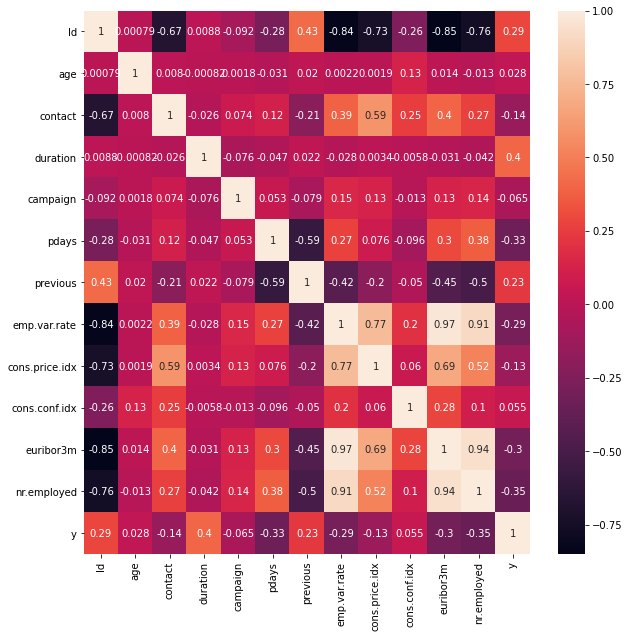

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)

## Dropping the unnecessary columns

In [13]:
drop_indices = ["Id", "campaign", "contact", "pdays", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed", "y"]
for i in drop_indices:
    data.drop(i, axis=1, inplace=True)
data

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,previous,poutcome,cons.conf.idx
0,49,blue-collar,married,basic.9y,unknown,no,no,nov,wed,227,0,nonexistent,-42.0
1,37,entrepreneur,married,university.degree,no,no,no,nov,wed,202,1,failure,-42.0
2,78,retired,married,basic.4y,no,no,no,jul,mon,1148,0,nonexistent,-40.3
3,36,admin.,married,university.degree,no,yes,no,may,mon,120,0,nonexistent,-36.4
4,59,retired,divorced,university.degree,no,no,no,jun,tue,368,0,nonexistent,-40.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,jul,tue,192,0,nonexistent,-40.3
32946,52,technician,married,professional.course,no,yes,no,nov,fri,64,1,failure,-42.0
32947,54,admin.,married,basic.9y,no,no,yes,jul,mon,131,0,nonexistent,-42.7
32948,29,admin.,married,university.degree,no,no,no,may,fri,165,0,nonexistent,-36.4


<font size=3 style="font-family: 'Babes Neue'">The categorical data like the months and days of the week, and education hold some signigicant ordering. That is, they are ordinal data. So we are giving them a fixed ordering.</font>

In [14]:
months = {"jan":0, "feb":1, "mar":2, "apr":3, "may":4, "jun":5, "jul":6, "aug":7, "sep":8, "oct": 9, "nov":10, "dec":12}

data["month"] = data["month"].apply(lambda x: months.get(x))

In [15]:
days = {"mon":0, "tue":1, "wed":2, "thu":3, "fri":4}

data["day_of_week"] = data["day_of_week"].apply(lambda x: days.get(x))

In [16]:
education = {"illiterate":0, "basic.4y":1, "basic.6y":2, "basic.9y":3, "high.school":4, "professional.course":5, "university.degree":6, "unknown":7}

data["education"] = data["education"].apply(lambda x: education.get(x))

### Checking how the target variables vary with the months

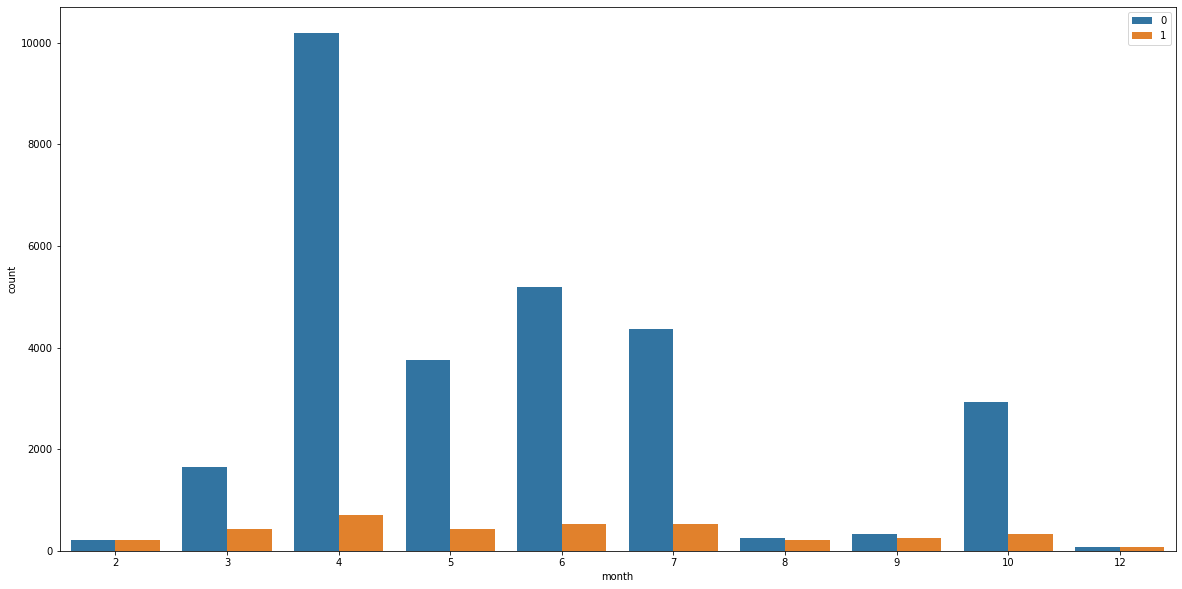

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x='month',data=data,hue=y)

## Converting categorical data to numerical data using One Hot Encoding

In [18]:
data = pd.get_dummies(data, columns=["job", "marital", "default", "housing", "loan", "poutcome"])
data

,age,education,month,day_of_week,duration,previous,cons.conf.idx,job_admin.,job_blue-collar,job_entrepreneur,...,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,3,10,2,227,0,-42.0,0,1,0,...,1,1,0,0,1,0,0,0,1,0
1,37,6,10,2,202,1,-42.0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,78,1,6,0,1148,0,-40.3,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,36,6,4,0,120,0,-36.4,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,59,6,5,1,368,0,-40.8,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,4,6,1,192,0,-40.3,0,0,0,...,0,0,0,1,1,0,0,0,1,0
32946,52,5,10,4,64,1,-42.0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
32947,54,3,6,0,131,0,-42.7,1,0,0,...,0,1,0,0,0,0,1,0,1,0
32948,29,6,4,4,165,0,-36.4,1,0,0,...,0,1,0,0,1,0,0,0,1,0


### Taking a look at the final dataset

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32609 entries, 0 to 32949
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   32609 non-null  int64  
 1   education             32609 non-null  int64  
 2   month                 32609 non-null  int64  
 3   day_of_week           32609 non-null  int64  
 4   duration              32609 non-null  int64  
 5   previous              32609 non-null  int64  
 6   cons.conf.idx         32609 non-null  float64
 7   job_admin.            32609 non-null  uint8  
 8   job_blue-collar       32609 non-null  uint8  
 9   job_entrepreneur      32609 non-null  uint8  
 10  job_housemaid         32609 non-null  uint8  
 11  job_management        32609 non-null  uint8  
 12  job_retired           32609 non-null  uint8  
 13  job_self-employed     32609 non-null  uint8  
 14  job_services          32609 non-null  uint8  
 15  job_student        

## Now applying machine learning model to the data.

<font size=3.5>Since this is a binary classification problem, I am using Logistic Regression to classify this data.</font>

In [20]:
from sklearn.linear_model import LogisticRegression

In [51]:
from sklearn.model_selection import train_test_split

X_tr, X_t, y_tr, y_t = train_test_split(data, y, test_size=0.20)

lr = LogisticRegression(C=0.01, solver="liblinear")
lr.fit(X_tr, y_tr)

LogisticRegression(C=0.01, solver='liblinear')

In [52]:
# ypred = svc.predict(X_t)
ypred = lr.predict(X_t)

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(ypred, y_t)

0.9060104262496167

### We get an accuracy of 90.60%
---

## Now importing the actual test data set

In [54]:
test = pd.read_csv('test.csv')
test.head()

,Id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,14455,32,management,divorced,university.degree,no,no,no,cellular,jul,...,131,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
1,36380,37,unemployed,unknown,university.degree,no,no,no,cellular,jun,...,100,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2
2,40076,73,retired,divorced,professional.course,unknown,yes,no,cellular,jul,...,131,2,999,0,nonexistent,-1.7,94.215,-40.3,0.810,4991.6
3,10778,44,entrepreneur,married,basic.4y,unknown,no,no,telephone,jun,...,48,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
4,27939,28,admin.,single,high.school,no,no,no,cellular,mar,...,144,2,999,0,nonexistent,-1.8,92.843,-50.0,1.531,5099.1


In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              8238 non-null   int64  
 1   age             8238 non-null   int64  
 2   job             8238 non-null   object 
 3   marital         8238 non-null   object 
 4   education       8238 non-null   object 
 5   default         8238 non-null   object 
 6   housing         8238 non-null   object 
 7   loan            8238 non-null   object 
 8   contact         8238 non-null   object 
 9   month           8238 non-null   object 
 10  day_of_week     8238 non-null   object 
 11  duration        8238 non-null   int64  
 12  campaign        8238 non-null   int64  
 13  pdays           8238 non-null   int64  
 14  previous        8238 non-null   int64  
 15  poutcome        8238 non-null   object 
 16  emp.var.rate    8238 non-null   float64
 17  cons.price.idx  8238 non-null   f

In [56]:
for i in test:
    if type(test[i][0]) == str:
        print(test[i].value_counts(), "\n")

admin.           2108
blue-collar      1813
technician       1343
services          773
management        579
retired           354
self-employed     322
entrepreneur      296
unemployed        216
housemaid         205
student           164
unknown            65
Name: job, dtype: int64 

married     4975
single      2311
divorced     937
unknown       15
Name: marital, dtype: int64 

university.degree      2432
high.school            1919
basic.9y               1219
professional.course    1051
basic.4y                854
basic.6y                427
unknown                 334
illiterate                2
Name: education, dtype: int64 

no         6581
unknown    1657
Name: default, dtype: int64 

yes        4322
no         3722
unknown     194
Name: housing, dtype: int64 

no         6819
yes        1225
unknown     194
Name: loan, dtype: int64 

cellular     5236
telephone    3002
Name: contact, dtype: int64 

may    2758
jul    1411
aug    1230
jun    1071
nov     835
apr     547
oct

In [57]:
test = test[test.marital != "unknown"]
test = test[test.default != "yes"]  
test = test[test.education != "illiterate"]
test = test[test.job != "unknown"]
drop_indices = ["Id", "campaign", "contact", "pdays", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed"]
for i in drop_indices:
    test.drop(i, axis=1, inplace=True)
    
months = {"jan":0, "feb":1, "mar":2, "apr":3, "may":4, "jun":5, "jul":6, "aug":7, "sep":8, "oct": 9, "nov":10, "dec":12}

test["month"] = test["month"].apply(lambda x: months.get(x))
days = {"mon":0, "tue":1, "wed":2, "thu":3, "fri":4}

test["day_of_week"] = test["day_of_week"].apply(lambda x: days.get(x))
education = {"illiterate":0, "basic.4y":1, "basic.6y":2, "basic.9y":3, "high.school":4, "professional.course":5, "university.degree":6, "unknown":7}

test["education"] = test["education"].apply(lambda x: education.get(x))
test = pd.get_dummies(test, columns=["job", "marital", "default", "housing", "loan", "poutcome"])
test

,age,education,month,day_of_week,duration,previous,cons.conf.idx,job_admin.,job_blue-collar,job_entrepreneur,...,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,32,6,6,1,131,0,-42.7,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,73,5,6,3,131,0,-40.3,0,0,0,...,1,0,0,1,1,0,0,0,1,0
3,44,1,5,1,48,0,-41.8,0,0,1,...,1,1,0,0,1,0,0,0,1,0
4,28,4,2,4,144,0,-50.0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
5,45,3,7,4,126,0,-31.4,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,48,3,4,1,725,0,-46.2,0,0,0,...,0,0,0,1,1,0,0,0,1,0
8234,30,4,4,4,159,0,-46.2,0,0,0,...,0,0,0,1,1,0,0,0,1,0
8235,33,4,5,0,472,1,-39.8,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8236,44,2,4,0,668,0,-36.4,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [59]:
y = lr.predict(test)
y

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
import pickle as pkl

with open("test_data_result.dat", "wb") as f:
    pkl.dump(y, f)
    f.close()